# Overview

### Business and Data Understanding

##### Business Understanding

In [105]:
#Import the necessary libraries and modules for dealing with the dataset and its data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import scipy.stats as stats
import statsmodels as statsmd
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Loading the dataset
df = pd.read_csv('customerchurndata.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False



##### Data Understanding


##### In this section, we did some exploration in viewing and understanding the data with the aim of getting the domain knowledge of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.shape

(3333, 21)

From the above cell, we can note that this data has 3,333 rows and 21 columns

In [6]:
#Creates a function for viewing the columns in the dataset
def col_info(df):
    print('col_names: \n', df.columns)
    print('num_cols: \n', df.select_dtypes(int).columns)
    print('cat_cols: \n', df.select_dtypes(object).columns)
    print('float_cols: \n', df.select_dtypes(float))

col_info(df)

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index([], dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
float_cols: 
       total day minutes  total day charge  total eve minutes  \
0                 265.1             45.07              197.4   
1                 161.6             27.47              195.5   
2                 243.4             41.38              121.2   
3                 299.4             50.90               61.9   
4                 166.7            

In [7]:
# Describing the dataset using descriptive statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# Checking for missing values
df.isna().count()

state                     3333
account length            3333
area code                 3333
phone number              3333
international plan        3333
voice mail plan           3333
number vmail messages     3333
total day minutes         3333
total day calls           3333
total day charge          3333
total eve minutes         3333
total eve calls           3333
total eve charge          3333
total night minutes       3333
total night calls         3333
total night charge        3333
total intl minutes        3333
total intl calls          3333
total intl charge         3333
customer service calls    3333
churn                     3333
dtype: int64

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

From the above cells, we can see that there are no missing values nor duplicated values detected in our datasets.

#### Data Preparation

##### EDA

In [10]:
def cleaning(df):
    missing = df.isna().sum().sum()
    duplicates = df.duplicated().sum()
    return (f"There are {missing} missing values and {duplicates} duplicated values in the dataset")

cleaning(df)

'There are 0 missing values and 0 duplicated values in the dataset'

In [11]:
# Checking for unique values
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [12]:
# Dropping 'phone number' comumn since it will not be useful in our analysis
df.drop("phone number", axis=1, inplace=True)

In [13]:
# Checking that the column it's dropped.
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

<AxesSubplot:>

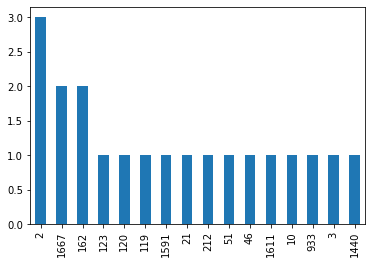

In [14]:
# Visualizing unique values
df.nunique().value_counts().plot(kind='bar')


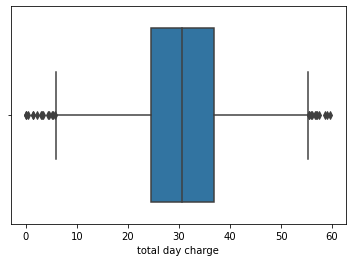

In [15]:
# Checking the relationship in the columns of the dataset
sns.boxplot(data=df, x='total day charge')
plt.show()

<AxesSubplot:>

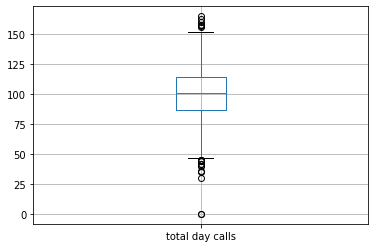

In [16]:
df.boxplot('total day calls')

<AxesSubplot:>

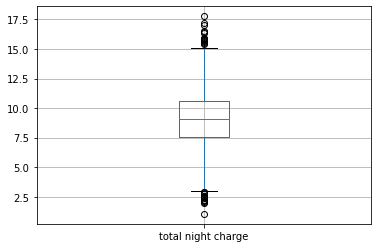

In [82]:
df.boxplot('total night charge')

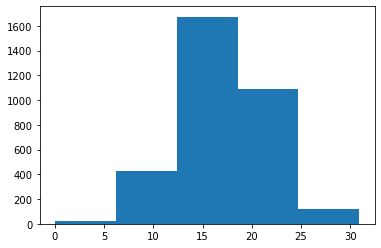

In [18]:
plt.hist(df['total eve charge'], bins=5)
plt.show()

In [19]:
# Distribution of churn
churn_counts = df['churn'].value_counts()
print(churn_counts)

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

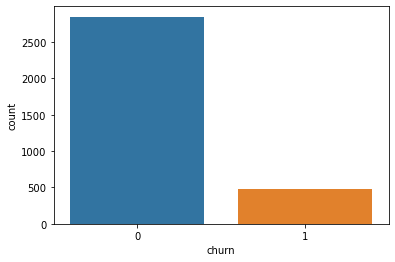

In [146]:
# Plotting the distribution of churn
sns.countplot(data=df, x=df['churn'])

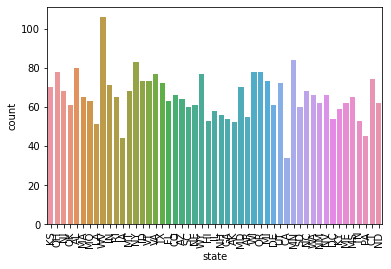

In [161]:
sns.countplot(data=df, x=df['state'])
plt.xticks(rotation=90);

In [22]:
# Numeric feature distributions
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                    'total intl calls', 'total intl charge', 'customer service calls']
print(numeric_features)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


### Checking for outliers

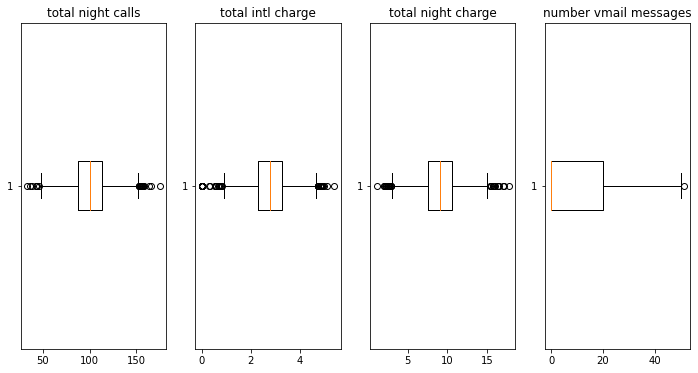

In [23]:
num_cols = ["total night calls", "total intl charge", "total night charge","number vmail messages"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()

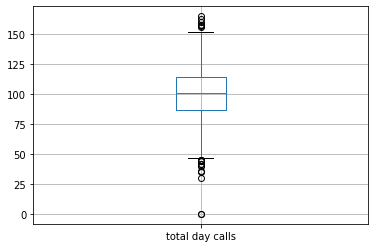

In [81]:
df.boxplot('total day calls')
plt.show()

In [ ]:
df.boxplot('total day calls')
plt.show()

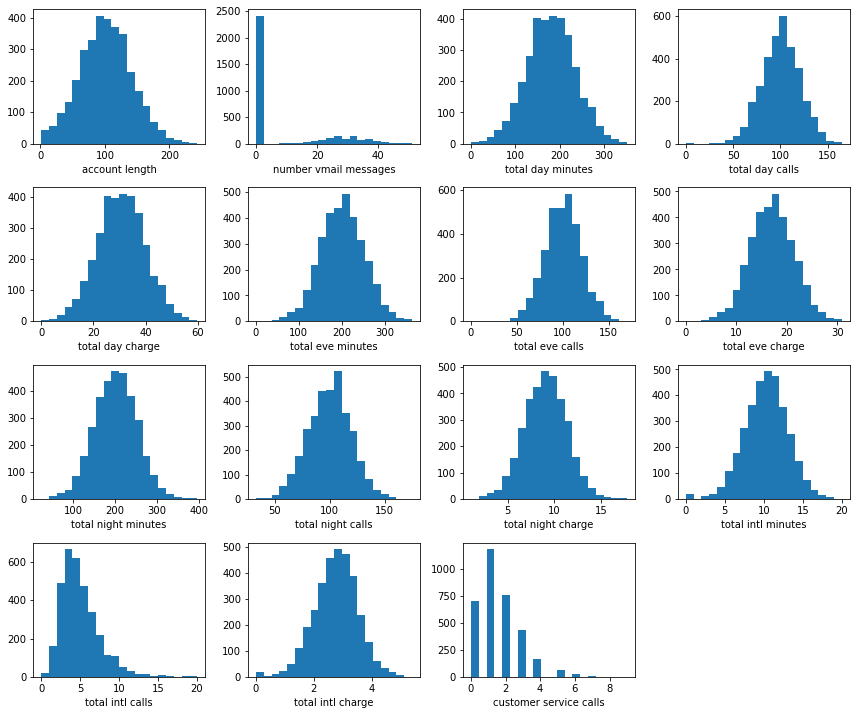

In [24]:
# Plotting histograms for numeric features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [25]:
# Categorical feature distributions
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']
print(categorical_features)

['state', 'area code', 'international plan', 'voice mail plan']


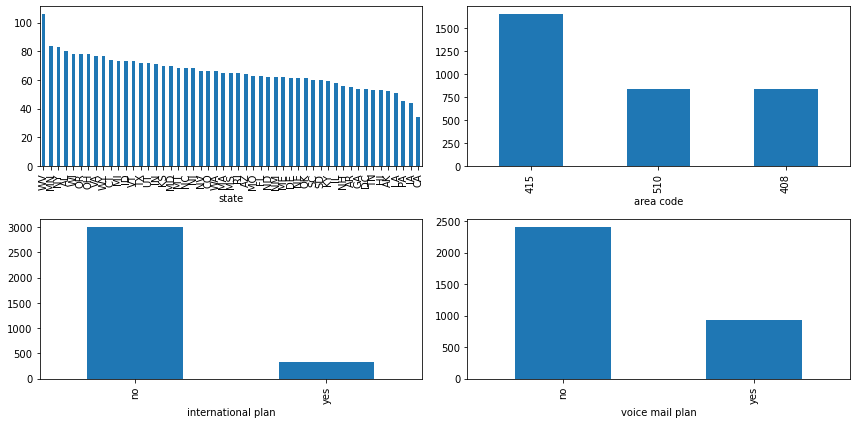

In [26]:
# Plotting bar plots for categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [27]:
# Correlation matrix
correlation_matrix = df.corr()

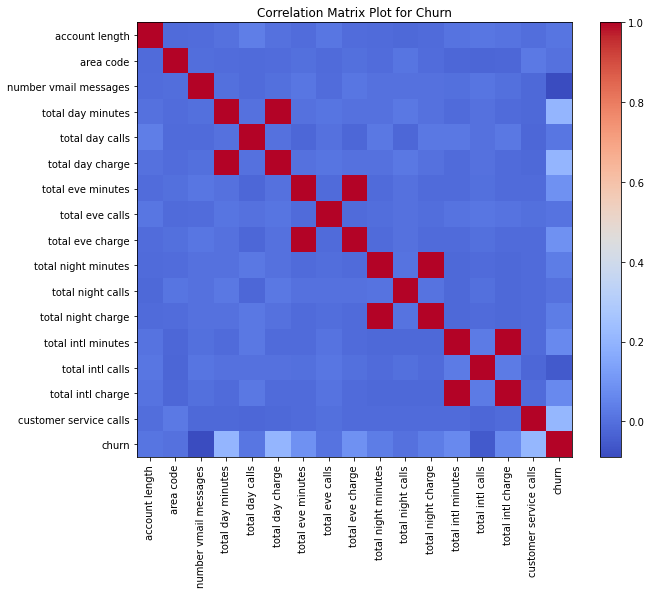

In [28]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix Plot for Churn')
plt.show()

In [29]:
# Converting churn column into categories
df['churn'] = df['churn'].astype('int8')
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int8

In [69]:
# Converting 'international plan' and 'voice plan' columns to categorical columns
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

### Modelling

#### Baseline Modelling

In [59]:
# Defining X and y variables
X = df.drop(['churn', 'state'], axis=1)
y = df['churn']

In [60]:
# Performing a test split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Scaling the dataset
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)
print(X_train_scaled, X_test_scaled)

[[ 3.60138166  1.73584027 -0.32662405 ...  0.63484856 -1.30413226
   0.31897761]
 [ 0.18495105 -0.51716801 -0.32662405 ... -0.18437035 -2.19152464
   1.81351945]
 [-0.65017643 -0.51716801  3.06162389 ...  1.86367691 -0.5491865
  -0.42829331]
 ...
 [-0.87793847 -0.68317915 -0.32662405 ...  0.22523911 -0.37700589
  -0.42829331]
 [ 1.72867155 -0.51716801 -0.32662405 ...  0.63484856 -0.1253573
   0.31897761]
 [-1.63714527 -0.68317915 -0.32662405 ...  0.63484856 -0.58892049
   0.31897761]] StandardScaler()


In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train_scaled, y_train)
y_base_pred = base_model.predict(X_test_scaled)

In [64]:
base_score = base_model.score(X_test_scaled, y_test)
base_score

0.8575712143928036

In [65]:
# Cross Validation
base_cv = cross_val_score(base_model, X_train_scaled, y_train)
base_cv

array([0.85580524, 0.86866792, 0.87054409, 0.84803002, 0.8630394 ])

In [108]:
# Classification report for confusion matrix 
base_report = classification_report(y_test, y_base_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



Text(0.5, 1.0, 'Confusion Matrix - Training Data')

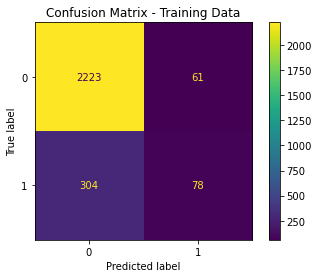

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the training data
y_train_pred = base_model.predict(X_train_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Create ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)

# Plot the confusion matrix
cm_display.plot()

# Add title and axis labels
plt.title('Confusion Matrix - Training Data')

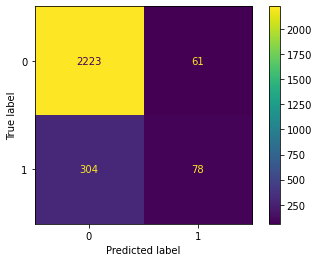

In [71]:
ConfusionMatrixDisplay.from_estimator(base_model, X_train_scaled, y_train)

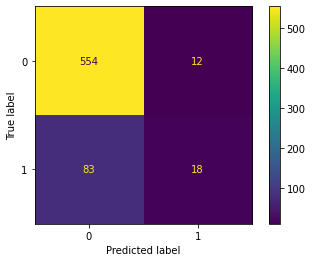

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_base_pred);

### Decision Tree Classifier

In [110]:
# Decision tree model classifier 
tree = DecisionTreeClassifier(random_state=42, max_depth=5)

tree.fit(X_train_scaled, y_train)
y_tree_pred = tree.predict(X_test_scaled)

# Scoring on trained data
tree_train_score = tree.score(X_train_scaled, y_train)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)


Trained data score:  0.9572393098274569
Test data score:  0.9370314842578711


In [86]:
# Cross validation
tree_cv = cross_val_score(tree, X_train_scaled, y_train)
tree_cv

array([0.93445693, 0.93621013, 0.93245779, 0.93245779, 0.94934334])

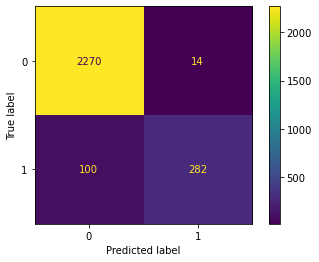

In [88]:
ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train)

### KNN MODEL

In [95]:
# Knn Model
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)
knn.predict_proba(X_test_scaled)

array([[0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [99]:
# Knn Model Score
knn_score = knn.score(X_train_scaled, y_train)
knn_score

0.9186046511627907

#### Ridge & Lasso

In [89]:
ridge = Ridge(random_state=42)

ridge.fit(X_train_scaled, y_train)

NameError: name 'Ridge' is not defined

#### Random Forest

In [114]:
# Random forest classifier model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [143]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
clf.fit(X_test, y_test)

y_clf_pred = clf.predict(X_test)

In [128]:
# clf score 
clf_score = clf.score(X_train, y_train)
clf_score

0.9204801200300075

In [138]:

clf_cv = cross_val_score(clf, X_train_scaled, y_train)
clf_cv

array([0.9494382 , 0.95684803, 0.95309568, 0.94746717, 0.96247655])

c:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


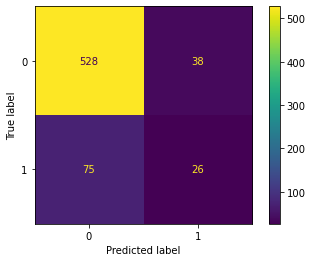

In [140]:
# 
ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)

In [141]:
clf_report = classification_report(y_test, y_clf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       101

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



## Evaluation

### Conclusion

##### Recommendations